In [0]:
from google.colab import files
uploaded = files.upload()

Saving hys.jpeg to hys.jpeg


In [0]:
from google.colab import files
uploaded = files.upload()

Saving redred.jpg to redred.jpg


In [0]:
from google.colab import files
uploaded = files.upload()

Saving digit.jpg to digit.jpg


In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


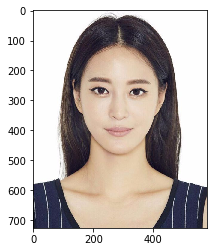

(725, 580, 3)


In [0]:
img = cv2.imread('hys.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
print(img.shape)

cv2.resize(img, (가로,세로), fx,fy,interpolation)
크기 키울 때 cv2.INTER_CUBIC, cv2.INTER_LINEAR
줄일 떄 : cv2.INTER_AREA 

(1616, 1200, 3)


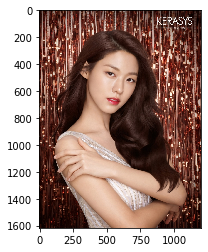

In [0]:
expand = cv2.resize(img, None, fx = 2.0, fy = 2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
print(expand.shape)

이미지 위치 변경
[[1,0,100],[0,1,10]] (a,b)좌표를 (a+100,b+10) 으로 옮김

In [0]:
height, width = img.shape[:2]
M = np.float32([[1,0,100],[0,1,10]])
dst = cv2.warpAffine(img, M, (width, height))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

NameError: ignored

cv2.getRotationMatrix2D((중심좌표), 회전각도, 스케일)

[[ 3.061617e-17  5.000000e-01  9.800000e+01]
 [-5.000000e-01  3.061617e-17  5.540000e+02]]


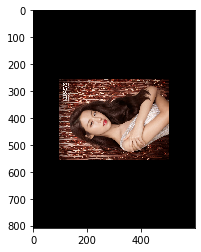

In [0]:
R = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 0.5)
R_dst = cv2.warpAffine(img, R, (width, height))
print(R)
plt.imshow(cv2.cvtColor(R_dst, cv2.COLOR_BGR2RGB))
plt.show()

이미지 합치기 cv2.add():saturation 연산해서 0보다 작으면 0, 255보다 크면 255
np.add(): 255 modulo연산, 256은1로 257은 2로 

(183, 275, 3)
(808, 600, 3)


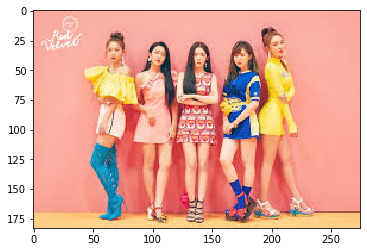

In [0]:
img2 = cv2.imread('redred.jpg')
print(img2.shape)
print(img.shape)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
img1 = cv2.resize(img, (275, 183),fx=1.0,fy=1.0, interpolation=cv2.INTER_AREA)

In [0]:
print(img1.shape)

(183, 275, 3)


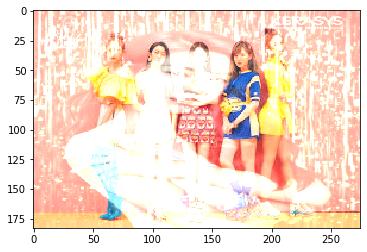

In [0]:
syn = cv2.add(img2, img1)
plt.imshow(cv2.cvtColor(syn, cv2.COLOR_BGR2RGB))
plt.show()

임계점 cv2.threshold(img, thresh, max_value, type)
img: grey scale img
thresh:임계값 max_value: 임계값 넘었을 때 적용 할 값
type BINARY: 임계값보다 크면 max_value 작으면 0
TRUNC: 임계값보다 크면 임계값 작으면 그대로


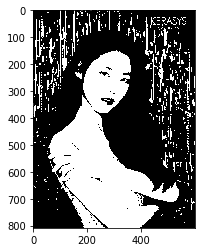

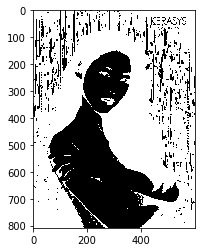

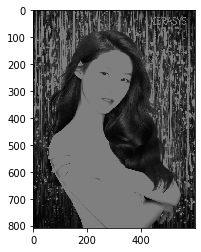

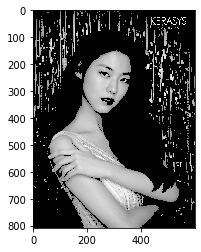

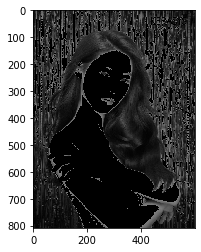

In [0]:
img_gray = cv2.imread('sulhyun.jpg', cv2.IMREAD_GRAYSCALE)
images = []
ret, thres1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(img_gray, 127,255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)
for i in images:
  plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
  plt.show()

adaptive threshhold
cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C)
adaptive_method:임계점 설정 방법
ADAPTIVE_THRESH_MEAN_C:주변영역의 평균값
ADAPTIVE_THRESH_GAUSSIAN_C:가우시안으로 처리
block_size:임계값 적용할 영역 크기
C: 평균이나 가중평균에서 차감할 값
->
->특정영역마다 다른 임계값 사용가능

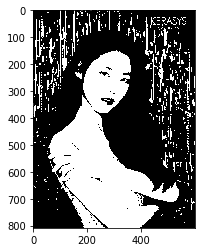

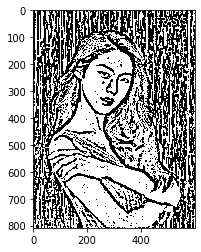

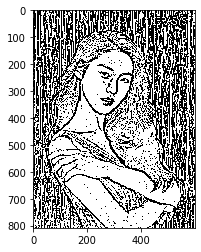

In [0]:
thres6 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21,3)
thres7 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21,3)

plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_GRAY2RGB))
plt.show()
plt.imshow(cv2.cvtColor(thres6, cv2.COLOR_GRAY2RGB))
plt.show()
plt.imshow(cv2.cvtColor(thres7, cv2.COLOR_GRAY2RGB))
plt.show()

직선그리기

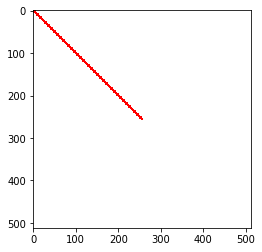

In [0]:
image_line = np.full((512, 512, 3), 255, np.uint8)
cv2.line(image_line, (0,0), (255,255), (255, 0, 0), 5)
plt.imshow(image_line)
plt.show()

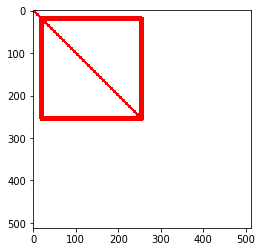

In [0]:
cv2.rectangle(image_line, (20,20),(255,255), (255,0,0), 10)
plt.imshow(image_line)
plt.show()

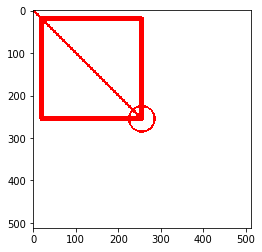

In [0]:
cv2.circle(image_line, (255,255), 30, (255,0,0),3)
plt.imshow(image_line)
plt.show()

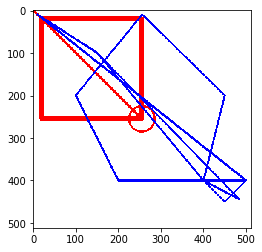

In [0]:
points = np.array([[256,10],[100,200],[200, 400],[400,400],[450,200]])
cv2.polylines(image_line, [points], True, (0,0,255), 4)
plt.imshow(image_line)
plt.show()

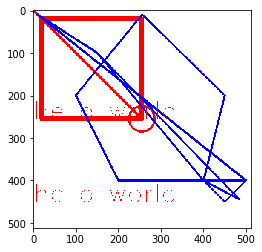

In [0]:
cv2.putText(image_line, 'hello world', (0,450), cv2.FONT_ITALIC,2,(255,0,0))
plt.imshow(image_line)
plt.show()

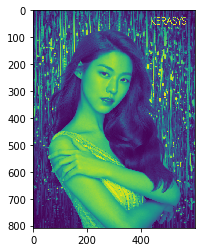

In [0]:
plt.imshow(img_gray)
plt.show()

In [0]:
img_c = cv2.imread('sulhyun.jpg')
print(img_c)


[[[19 20 58]
  [10 12 47]
  [ 9 10 44]
  ...
  [33 40 60]
  [25 30 55]
  [ 8 13 38]]

 [[ 2  5 43]
  [ 3  5 40]
  [ 5  7 41]
  ...
  [37 44 64]
  [38 44 67]
  [24 30 53]]

 [[ 2  8 43]
  [ 3  9 44]
  [ 5  7 41]
  ...
  [40 46 65]
  [39 46 65]
  [32 39 59]]

 ...

 [[ 0  0  8]
  [ 0  0 10]
  [ 0  0 14]
  ...
  [ 3  7 25]
  [11 15 39]
  [12 17 42]]

 [[ 0  1  6]
  [ 0  0  8]
  [ 0  2 13]
  ...
  [ 2  4 22]
  [10 12 36]
  [12 16 41]]

 [[ 0  1  6]
  [ 0  0  8]
  [ 0  0 11]
  ...
  [ 2  4 22]
  [ 7  9 33]
  [11 15 40]]]


contour:테두리 구분하기